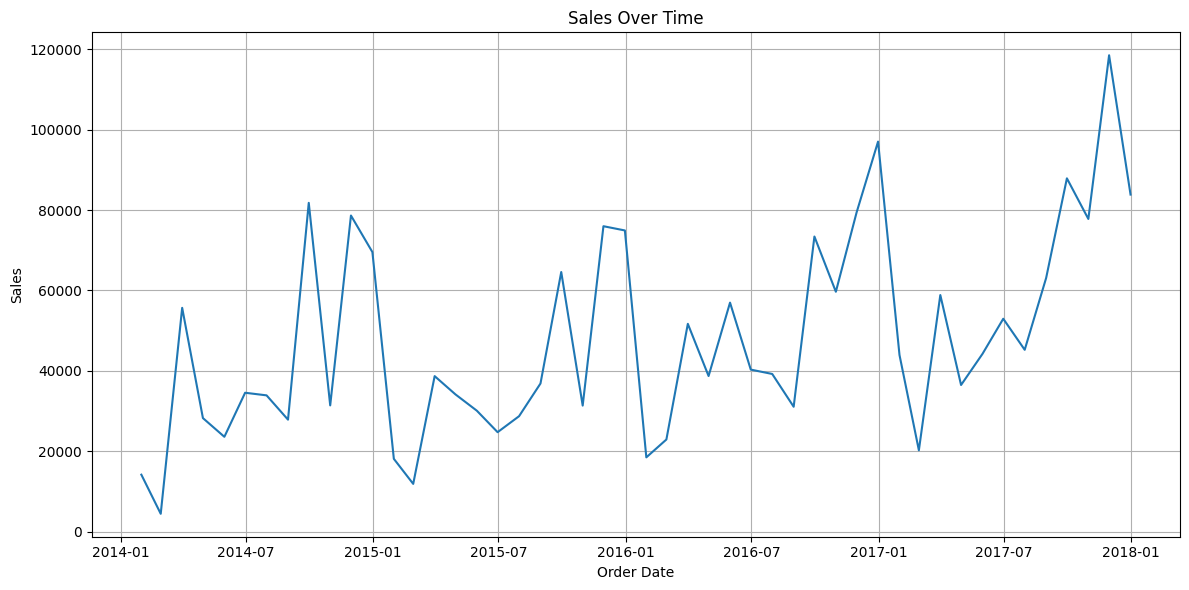

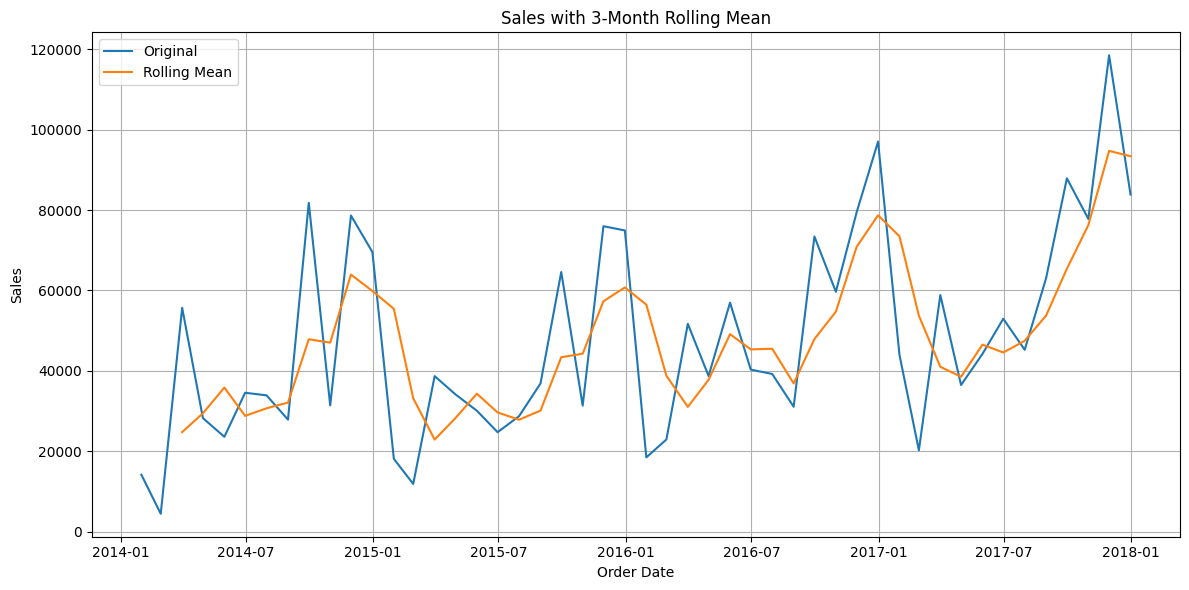




Model Evaluation Metrics:
Mean Absolute Error (MAE): 11286.44
Root Mean Squared Error (RMSE): 14811.52





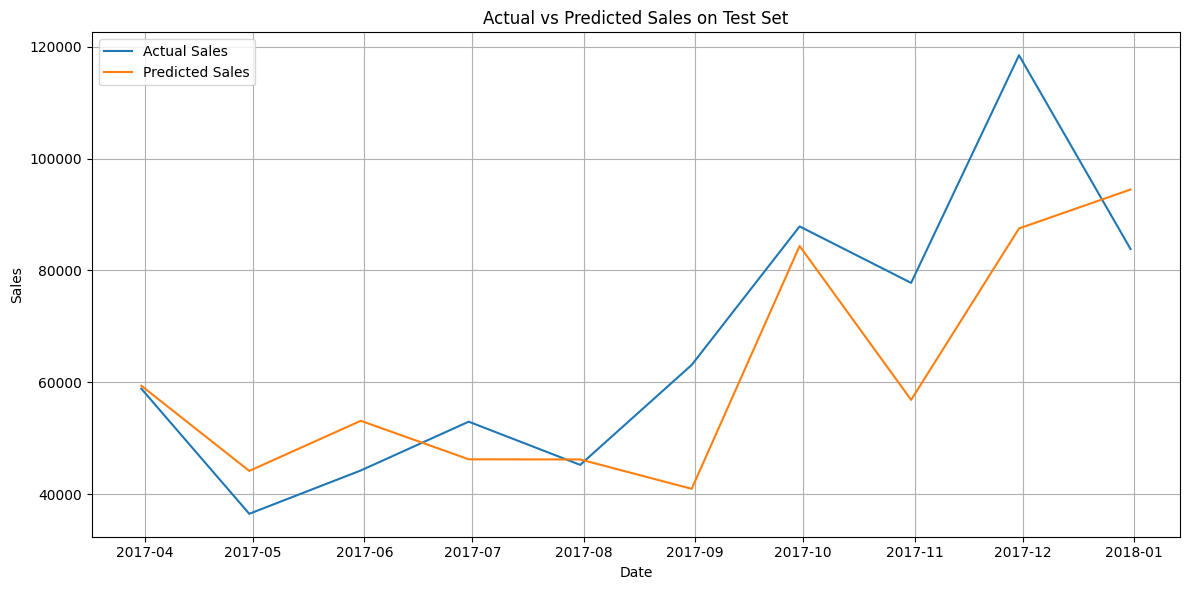

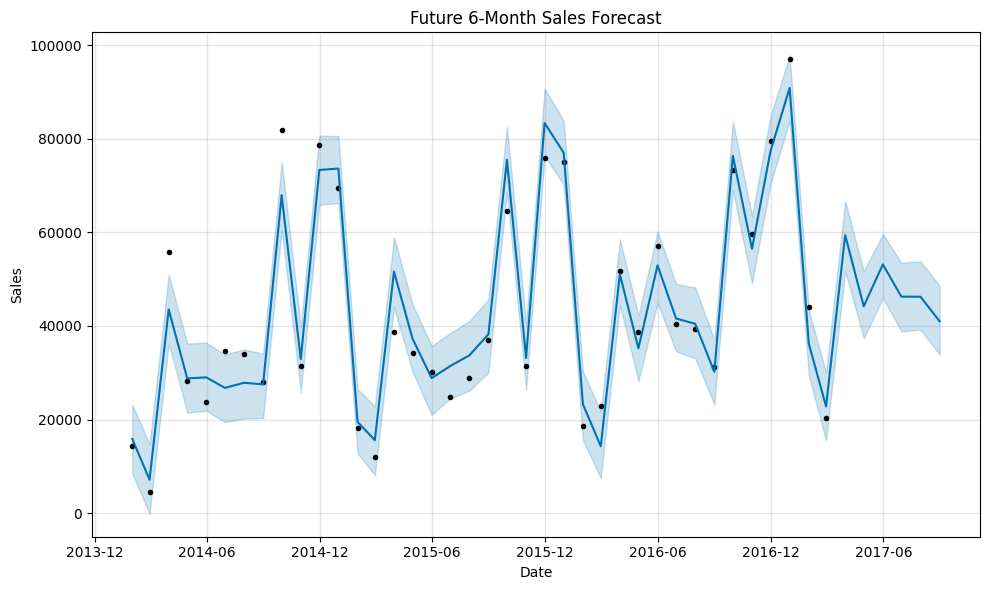

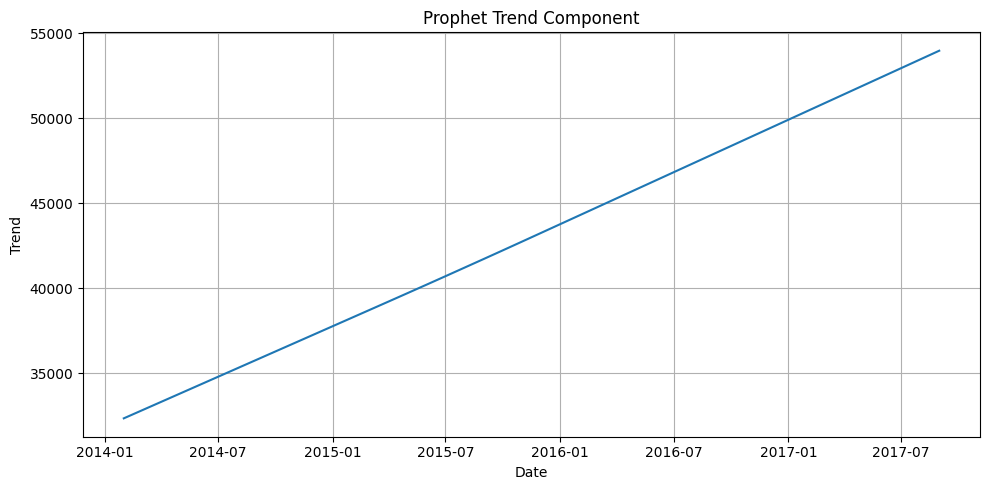

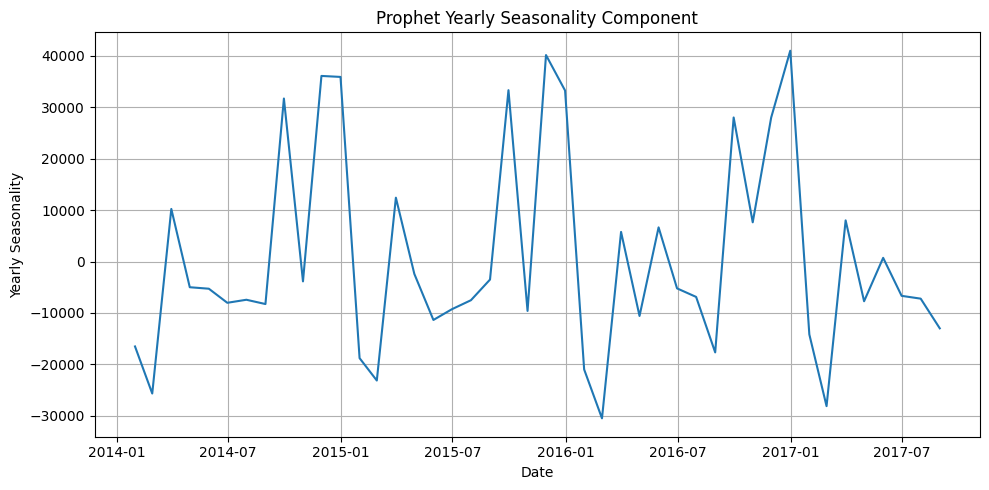

In [31]:
import logging
import warnings

# Suppress INFO messages from cmdstanpy, which Prophet uses
logging.getLogger('cmdstanpy').setLevel(logging.ERROR);

# Suppress INFO messages from Prophet itself
logging.getLogger('prophet').setLevel(logging.ERROR);

# Suppress all FutureWarning messages globally
warnings.simplefilter(action='ignore', category=FutureWarning)

#installing libraries
!pip install -q prophet

#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

#load dataset
df = pd.read_csv("Sample - Superstore.csv", encoding='cp1252')

#covert date coloumn
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')

df = df.dropna()

df = df.groupby(pd.Grouper(key='Order Date', freq='ME')).sum().reset_index()

#plotting sales over time
plt.figure(figsize=(12,6))
plt.plot(df['Order Date'], df['Sales'])
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
print()
print()
print()

#rolling average for trend view
df['Rolling_Mean'] = df['Sales'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Order Date'], df['Sales'], label='Original')
plt.plot(df['Order Date'], df['Rolling_Mean'], label='Rolling Mean')
plt.title("Sales with 3-Month Rolling Mean")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print()
print()
print()

#preparing data for prophet
df_prophet = df[['Order Date', 'Sales']]
df_prophet.columns = ['ds', 'y']

#train-test split
train_size = int(len(df_prophet) * 0.8)

train = df_prophet[:train_size]
test = df_prophet[train_size:]

#train prophet model
model = Prophet()
model.fit(train)

#make predictions
future = model.make_future_dataframe(periods=len(test), freq='ME')
forecast = model.predict(future)

#extract only prediction part
pred = forecast[['ds', 'yhat']]

#merge with test
comparison = test.merge(pred, on='ds')

#mae and rmse
mae = mean_absolute_error(comparison['y'], comparison['yhat'])
rmse = np.sqrt(mean_squared_error(comparison['y'], comparison['yhat']))

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print()
print()
print()

#plotting forecast vs actual sales
plt.figure(figsize=(12,6))
plt.plot(comparison['ds'], comparison['y'], label='Actual Sales')
plt.plot(comparison['ds'], comparison['yhat'], label='Predicted Sales')
plt.legend()
plt.title("Actual vs Predicted Sales on Test Set")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
print()
print()
print()

#predicting the future 6 months
future_6 = model.make_future_dataframe(periods=6, freq='ME')
forecast_6 = model.predict(future_6)

fig_forecast = model.plot(forecast_6)
ax_forecast = fig_forecast.gca()
ax_forecast.set_title("Future 6-Month Sales Forecast")
ax_forecast.set_xlabel("Date")
ax_forecast.set_ylabel("Sales")
ax_forecast.grid(True)
plt.tight_layout()
plt.show()
print()
print()
print()

# Plot Trend Component
plt.figure(figsize=(10, 5))
plt.plot(forecast_6['ds'], forecast_6['trend'])
plt.title("Prophet Trend Component")
plt.xlabel("Date")
plt.ylabel("Trend")
plt.grid(True)
plt.tight_layout()
plt.show()
print()
print()
print()

# Plot Yearly Seasonality Component
plt.figure(figsize=(10, 5))
plt.plot(forecast_6['ds'], forecast_6['yearly'])
plt.title("Prophet Yearly Seasonality Component")
plt.xlabel("Date")
plt.ylabel("Yearly Seasonality")
plt.grid(True)
plt.tight_layout()
plt.show()